## Find gene expression per atlas ROI

Gabriella Chan 27/06/23

Monash University

Simple module, pulls gene expression per atlas ROI from the AHBA using abagen. (Note; abagen 0.1.3 seems to require pandas<=1.5.3)

In [1]:
import abagen
import pandas as pd
import numpy as np
from scipy.stats import zscore 
print ("imports done")

ahba_data_dir = '/fs03/kg98/gchan/SIR_SCZ/SIR_parcellations/data-ahba'

files = abagen.fetch_microarray(donors='all', data_dir=ahba_data_dir)
print ("AHBA get")

# built-in Desikan Killiany
atlas_abagen = abagen.fetch_desikan_killiany(data_dir=ahba_data_dir)
print("abagen DK atlas get")
expression_abagen = abagen.get_expression_data(atlas_abagen['image'], atlas_abagen['info'], n_proc = 6, data_dir=ahba_data_dir)
print("abagen DK expression get")

# # external atlases
# atlas_dir = '/scratch/kg98/gchan/Atlases/SIR/'
# # neuroparc Desikan-Killiany
# atlas_neuroparc = {}
# atlas_neuroparc['image'] = atlas_dir + 'DK_neuroparc/Desikan_space-MNI152NLin6_res-1x1x1.nii.gz'
# atlas_neuroparc['info'] = atlas_dir + 'DK_neuroparc/Desikan.csv'
# abagen.images.check_atlas(atlas_neuroparc['image'], atlas_neuroparc['info'])
# print("neuroparc DK atlas get")
# expression_neuroparc = abagen.get_expression_data(atlas_neuroparc['image'], atlas_neuroparc['info'], n_proc = 6)
# print("neuroparc DK expression get")

# # Schaefer 100 and Tian 32
# atlas_ts132 = {}
# atlas_ts132['image'] = atlas_dir + 'Schaefer_Tian/Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S2_MNI152NLin6Asym_1mm.nii.gz'
# atlas_ts132['info'] = atlas_dir + 'Schaefer_Tian/ts132_info.csv'
# abagen.images.check_atlas(atlas_ts132['image'], atlas_ts132['info'])
# print("S100 + T32 atlas get")
# expression_ts132 = abagen.get_expression_data(atlas_ts132['image'], atlas_ts132['info'], n_proc = 6)
# print("S100 + T32 expression get")

imports done
AHBA get
abagen DK atlas get


/scratch/kg98/gchan/conda_envs/sir/lib/python3.8/site-packages/abagen/probes_.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  reannotated.loc[:, 'entrez_id'] = reannotated['entrez_id'].astype('int')
/scratch/kg98/gchan/conda_envs/sir/lib/python3.8/site-packages/abagen/samples_.py:404: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gene_by_label = (microarray.groupby('label')
/scratch/kg98/gchan/conda_envs/sir/lib/python3.8/site-packages/abagen/samples_.py:404: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gene_by_label = (microarray.groupby('label')
/scratch/kg98/gchan/conda_envs/sir/lib/p

abagen DK expression get


In [6]:
atlas_info = pd.read_csv(atlas_abagen['info'])
print(atlas_info[30:50])

    id                    label hemisphere            structure
30  31              frontalpole          L               cortex
31  32             temporalpole          L               cortex
32  33       transversetemporal          L               cortex
33  34                   insula          L               cortex
34  35           thalamusproper          L  subcortex/brainstem
35  36                  caudate          L  subcortex/brainstem
36  37                  putamen          L  subcortex/brainstem
37  38                 pallidum          L  subcortex/brainstem
38  39            accumbensarea          L  subcortex/brainstem
39  40              hippocampus          L  subcortex/brainstem
40  41                 amygdala          L  subcortex/brainstem
41  42                 bankssts          R               cortex
42  43  caudalanteriorcingulate          R               cortex
43  44      caudalmiddlefrontal          R               cortex
44  45                   cuneus         

In [39]:
# Check info for LH indices, and trim for LH
# abagen DK atlas, 34 cort L, 7 subcort L, 34 cort R, 7 subcort R, brainstem
atlas_info_abagen = pd.read_csv(atlas_abagen['info'])
# print(atlas_info_abagen[34:41])
expr_abagen_l_cort = expression_abagen[0:34]
expr_abagen_l_subcort = expression_abagen[34:41]
print(expr_abagen_l_subcort.shape, expr_abagen_l_cort.shape)

# neuroparc DK atlas, 1 WM L, 34 cort L, 1 WM R, 34 cort R
atlas_info_neuroparc = pd.read_csv(atlas_neuroparc['info'])
# print(atlas_info_neuroparc[1:35])
expr_neuroparc_l_cort = expression_neuroparc[1:35]
print(expr_neuroparc_l_cort.shape)

# Tian-Schaefer 100, 16 subcort R, 16 subcort L, 50 cort L, 50 cort R, i.e. LH from 16:82
atlas_info_ts132 = pd.read_csv(atlas_ts132['info'])
# print(atlas_info_ts132[16:82])
expr_ts132_l_subcort = expression_ts132.iloc[16:32]
expr_ts132_l_cort = expression_ts132.iloc[32:82]
print(expr_ts132_l_subcort.shape, expr_ts132_l_cort.shape)

(7, 15633) (34, 15633)
(34, 15633)
(16, 15633) (50, 15633)


In [63]:
# reshape the following gene expression dataframes:
# DK cort (neuroparc), aseg subcort (abagen)
# S100 cort, Tian32 subcort (Tian)

expr_npdk = pd.concat([expr_neuroparc_l_cort, expr_abagen_l_subcort])
expr_abdk = pd.concat([expr_abagen_l_cort, expr_abagen_l_subcort])
expr_ts132 = pd.concat([expr_ts132_l_cort, expr_ts132_l_subcort])

In [60]:
print(ts132_out.shape, ts132_out_z.shape, dk_out.shape, dk_out_z.shape)
print(dk_out_z)

(66, 10435) (66, 10435) (41, 10435) (41, 10435)
           A1BG       A2M     A2ML1   A3GALT2    A4GALT      AAAS     AADAT  \
label                                                                         
2     -0.158646 -0.028192  0.406481  0.424519 -0.727639  0.905312  0.479268   
3      1.055549  0.657390  1.673569  0.744574 -0.258280 -0.802125  0.283513   
4      0.033356  0.636730 -0.478250  0.177877  0.883673  0.301811 -0.425924   
5      0.070573  0.753932  0.841332 -0.904765  1.009382  0.584505  0.701964   
6     -1.430141  0.043641 -0.057633  0.065304 -0.763413  1.479945  0.299910   
7      1.068485  1.208157  0.497930 -0.098569 -0.333383 -1.482448 -0.470020   
8      0.617766 -0.126430 -0.549921 -0.109369 -0.110162 -0.434285  0.149182   
9     -0.610218 -0.626070  0.002115 -0.370423  0.314318  0.213857  0.182617   
10     0.747541 -0.451464 -0.119143 -0.451507 -0.686460 -0.389510  0.122651   
11    -0.662625 -0.503149  0.322789 -0.203736 -0.013944  0.481192  0.926979   
12  

In [64]:
# iterate through genes with GO annotations
# check in gene expression data for each gene
# if so append to a dict of genes

# a 1d array of genes
GO_genes = pd.read_csv("data/GO_IDA_Homo-sapiens_prot_uniq_aliases.csv", header=None)

gene_expr_ts132 = {}
gene_expr_npdk = {}
gene_expr_abdk = {}
genes = []
for gene in GO_genes.iloc[:,0]:
    try:
        gene_expr_npdk[gene] = expr_npdk[gene][:]
        gene_expr_abdk[gene] = expr_abdk[gene][:]
        gene_expr_ts132[gene] = expr_ts132[gene][:]
        genes.append(gene)
    except Exception:
        pass
npdk_out = pd.DataFrame(data = gene_expr_npdk)
npdk_out = npdk_out.fillna(0)
npdk_out_z = npdk_out.apply(zscore)
abdk_out = pd.DataFrame(data = gene_expr_abdk)
abdk_out_z = abdk_out.apply(zscore)
ts132_out = pd.DataFrame(data = gene_expr_ts132)
ts132_out_z = ts132_out.apply(zscore)

# Write out
npdk_out.to_csv('results/gene_expr_neuroparc_cort_subcort.csv', index=False)
npdk_out_z.to_csv('results/gene_expr_neuroparc_z_cort_subcort.csv', index=False)
abdk_out.to_csv('results/gene_expr_abagen_cort_subcort.csv', index=False)
abdk_out_z.to_csv('results/gene_expr_abagen_z_cort_subcort.csv', index=False)
ts132_out.to_csv('results/gene_expr_TS132_cort_subcort.csv', index=False)
ts132_out_z.to_csv('results/gene_expr_TS132_z_cort_subcort.csv', index=False)

# # a list of all genes with abagen gene expression data
# genes_df = pd.DataFrame(genes, columns = ["genes"])
# genes_df.to_csv('results/all_annotated_AHBA_GO_genes.csv', index=False)

### Visualisations

- ROIS on atlas volumes
- Genes on atlas surfaces (inflated from volumes)

Text(0.5, 1.0, 'BGS GMV t statistics')

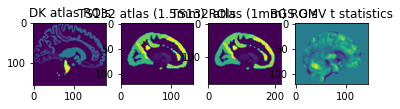

In [5]:
import nibabel as nib
import nibabel.processing
import nilearn
from nilearn import datasets, plotting, surface
import matplotlib.pyplot as plt
from abagen import images

atlas_dk_img = nib.load(atlas_dk['image'])
s100_img = nib.load('../../Atlases/Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S2_MNI152NLin6Asym_1.5mm.nii.gz')
s100_1mm_img = nib.load('../../Atlases/Schaefer2018_100Parcels_7Networks_order_Tian_Subcortex_S2_MNI152NLin6Asym_1mm.nii.gz')
bgs_t_img = nib.load('../GMV difference maps/braingluschi/T/swe_vox_Tstat_c01.nii')

# print(atlas_dk_img.get_sform(coded=True))
# print(bgs_t_img.get_sform(coded=True))
# print(bgs_t_img.get_sform(coded=True))
# print(bgs_t_img.get_sform(coded=True))
# print(atlas_dk_img.shape)
# print(s100_img.shape)
# print(s100_1mm_img.shape)
# print(bgs_t_img.shape)

atlas_dk_data = atlas_dk_img.get_fdata()
s100_data = s100_img.get_fdata()
s100_1mm_data = s100_1mm_img.get_fdata()
bgs_data = bgs_t_img.get_fdata()

fig, ax = plt.subplots(nrows = 1, ncols = 4)
plt.rcParams['figure.figsize'] = [30, 10]
ax[0].imshow(np.rot90(atlas_dk_data[60,:,:]))
ax[1].imshow(np.rot90(s100_data[50,:,:]))
ax[2].imshow(np.rot90(s100_1mm_data[75,:,:]))
ax[3].imshow(np.rot90(bgs_data[50,:,:]))
ax[0].set_title("DK atlas ROIs")
ax[1].set_title("TS132 atlas (1.5mm) ROIs")
ax[2].set_title("TS132 atlas (1mm) ROIs")
ax[3].set_title("BGS GMV t statistics")



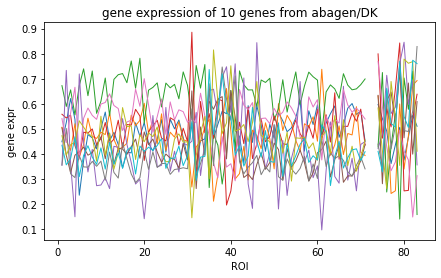

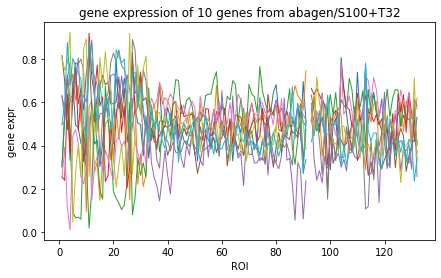

In [152]:
import random

import nibabel as nib
import nibabel.processing
import nilearn
from nilearn import datasets, plotting, surface
import matplotlib.pyplot as plt
from abagen import images

abagen_img = nib.load(atlas_dk['image'])
neuroparc_img = nib.load(atlas_neuroparc['image'])
s100_img = nib.load(atlas_ts132['image'])
bgs_t_img = nib.load('../GMV difference maps/braingluschi/T/swe_vox_Tstat_c01.nii')

# expression_dk = abagen.get_expression_data(atlas_dk['image'], atlas_dk['info'], n_proc = 6)

plt.rcParams['figure.figsize'] = [7, 4]
samples = random.sample(list(expression_dk), 10)
for sample in samples:
    plt.plot(expression_dk[:][sample], linewidth=1)
plt.title("gene expression of 10 genes from abagen/DK")
plt.xlabel("ROI")
plt.ylabel("gene expr")
plt.show()

for sample in samples:
    plt.plot(expression[:][sample], linewidth=1)
plt.title("gene expression of 10 genes from abagen/S100+T32")
plt.xlabel("ROI")
plt.ylabel("gene expr")
plt.show()

In [13]:
import nibabel as nib
import nibabel.processing
import nilearn
from nilearn import datasets, plotting, surface
import matplotlib.pyplot as plt
from abagen import images

abagen_img = nib.load(atlas_abagen['image'])
neuroparc_img = nib.load(atlas_neuroparc['image'])
ts132_img = nib.load(atlas_ts132['image'])

gene = "GNLY"
atlas_names = ['abagen', 'neuroparc', 'ts132']
atlas_imgs = [abagen_img, neuroparc_img, ts132_img]
atlas_exprs = [expression_abagen, expression_neuroparc, expression_ts132]

for atlas_name, atlas_img, atlas_expr in zip(atlas_names, atlas_imgs, atlas_exprs):
    gene_header = atlas_img.header.copy()
    gene_header['datatype'] = 16
    gene_affine = atlas_img.affine.copy()
    atlas_data = atlas_img.get_fdata()

    gene_data = np.zeros_like(atlas_data)

    for roi in np.unique(atlas_data):
        if roi == 0:
            continue
        roi_expr = atlas_expr[gene][roi]
        gene_data[atlas_data == roi] = roi_expr

    gene_img = nib.Nifti1Image(gene_data, gene_affine, gene_header)
    nib.save(gene_img, gene + '_' + atlas_name + '.nii')

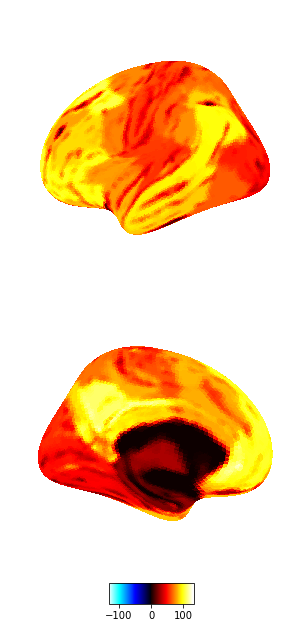

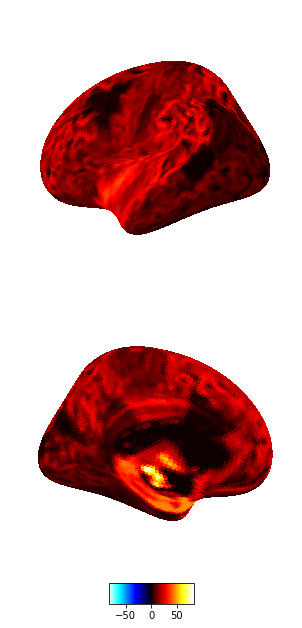

In [178]:
# setup
gene = "GNLY"
atlas_imgs = [s100_img, atlas_dk_img]

for atlas_img in atlas_imgs:
    # determine atlas shape
    x, y, z = atlas_img.shape
    atlas_data = atlas_img.get_fdata()

    # setup image header
    gene_header = atlas_img.header.copy()
    gene_header['datatype'] = 16
    gene_affine = atlas_img.affine.copy()

    # setup surface for plot_img_on_surf
    fsaverage = datasets.fetch_surf_fsaverage()
    curv_left = surface.load_surf_data(fsaverage.curv_left)
    curv_left_sign = np.sign(curv_left)

    gene_data = np.zeros((x,y,z))
    for i in range (0, x):
        for j in range (0, y):
            for k in range (0, z):
                roi = int(atlas_data[i][j][k])
                vox_gene_data = 0
                if atlas_img == s100_img:
                    if roi > 16 and roi <= 82:
                        vox_gene_data = expr_z.iloc[roi-1-16][gene]
                else:
                    if roi > 0 and roi <= 41:
                        vox_gene_data = expr_z.iloc[roi-1][gene]
                vox_gene_data = roi
                gene_data[i][j][k] = vox_gene_data
    gene_img = nib.nifti1.Nifti1Image(gene_data, gene_affine, header=gene_header) 

    texture = surface.vol_to_surf(gene_img, fsaverage.pial_left)
    nilearn.plotting.plot_img_on_surf(gene_img,
                                     views = ['lateral', 'medial'],
                                     hemispheres = ['left'],
                                     colorbar = True,
                                     inflate = True)
    nilearn.plotting.show()